https://www.kaggle.com/sbongo/for-beginners-tackling-toxic-using-keras

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

from wordcloud import WordCloud

%matplotlib inline
plt.style.use('seaborn-whitegrid')
print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.2.0-rc2


## Load Data

In [2]:
!git clone https://github.com/greenteaAde/toxic_comment_classification.git

import os 
os.chdir('toxic_comment_classification/')

Cloning into 'toxic_comment_classification'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 24 (delta 8), reused 17 (delta 5), pack-reused 0
Unpacking objects: 100% (24/24), done.


## Check Data

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_y = pd.read_csv("test_labels.csv")

In [4]:
print(train.shape)
train.head()

(159571, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
train[train.identity_hate == 1].iloc[:,1].head()

42     You are gay or antisemmitian? \n\nArchangel WH...
105           A pair of jew-hating weiner nazi schmucks.
176    I think that your a Fagget get a oife and burn...
218    Kill all niggers. \n\nI have hard, that others...
238    u r a tw@ fuck off u gay boy.U r smelly.Fuck u...
Name: comment_text, dtype: object

## Add label 'None' to non-toxic data

In [6]:
train_classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train['None'] = train.apply(lambda x: 1 if x[train_classes].max() == 0 else 0, axis = 1)
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,None
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1


## Data Frequency

In [0]:
train_classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'None']
y_train = train[train_classes].values
train_text = train["comment_text"]
test_text = test["comment_text"]

In [0]:
# tokenize
max_features = 20000
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(train_text))

# text to sequence
train_tokenized = tokenizer.texts_to_sequences(train_text)
test_tokenized = tokenizer.texts_to_sequences(test_text)

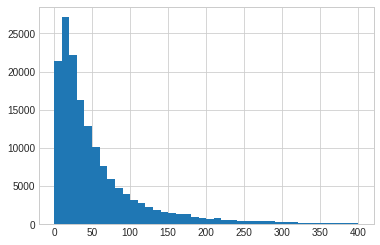

In [9]:
# to set proper max-length

totalNumWords = [len(one_comment) for one_comment in train_tokenized]
plt.hist(totalNumWords,bins = np.arange(0,410,10))
plt.show()

In [0]:
# padding

maxlen = 200
x_train = pad_sequences(train_tokenized, maxlen=maxlen)
x_test = pad_sequences(test_tokenized, maxlen=maxlen)

In [0]:
input = Input(shape=(maxlen, ))

In [0]:
# embedding

embed_size = 128
x = Embedding(max_features, embed_size)(input)
x = LSTM(60, return_sequences=True, name='lstm_layer')(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(7, activation="sigmoid")(x)

In [0]:
model = Model(inputs=input, outputs=x)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
batch_size = 32
epochs = 2
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/2
4488/4488 [==============================] - 300s 67ms/step - loss: 0.0791 - accuracy: 0.9473 - val_loss: 0.0566 - val_accuracy: 0.9622
Epoch 2/2
4488/4488 [==============================] - 300s 67ms/step - loss: 0.0512 - accuracy: 0.9629 - val_loss: 0.0540 - val_accuracy: 0.9620


In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 128)          2560000   
_________________________________________________________________
lstm_layer (LSTM)            (None, 200, 60)           45360     
_________________________________________________________________
global_max_pooling1d (Global (None, 60)                0         
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                3050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0     

In [0]:
# Using Pre-trained models to boost accuracy and take advantage of existing efforts
# Hyper-parameter tuning of bells and whistles
# Introduce early stopping during training of model
# Experiment with different architecture.